## Suma real estate Price Predictor


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RIM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RIM      499 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RIM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,499.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285709,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704464,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.627000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RIM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

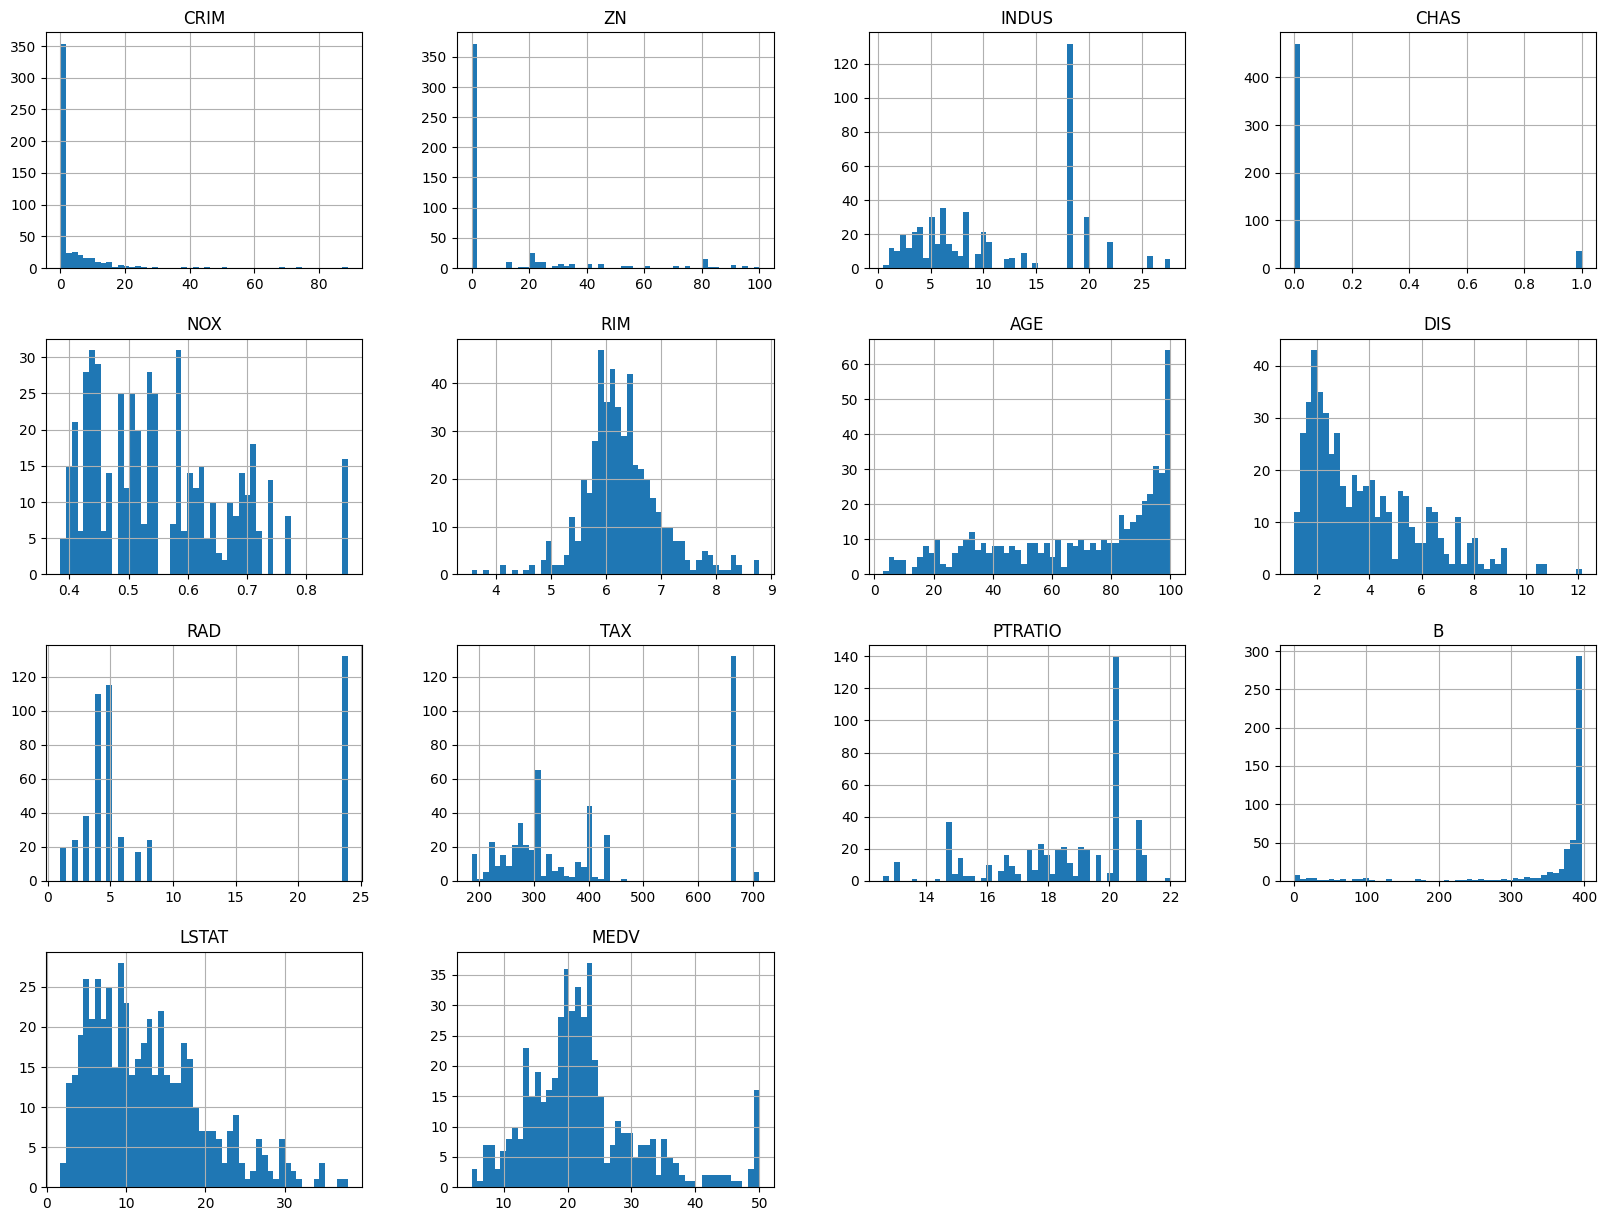

In [9]:
housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting


In [10]:
#for learning & understanding
def split_train_test(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)
print("Rows in train set:", len(train_set))
print("Rows in test set:", len(test_set))

Rows in train set: 404
Rows in test set: 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]    

In [14]:
strat_test_set['CHAS'].value_counts() #95/7 =13.57

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts() #376/28=13.57

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
housing=strat_train_set.copy() # made copy of train_set 

## Looking for Correlations

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RIM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RIM'>,
        <AxesSubplot: xlabel='RIM', ylabel='RIM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RIM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RIM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RIM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RIM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

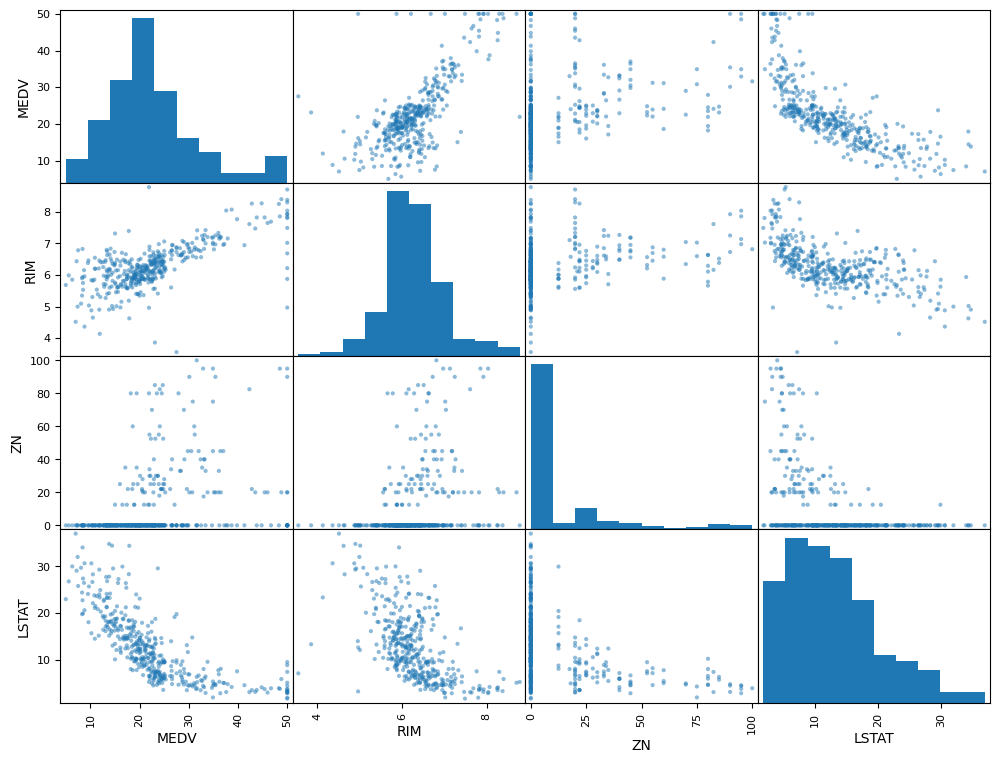

In [17]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RIM","ZN","LSTAT",]
scatter_matrix(housing[attributes],figsize=(12,9))

<AxesSubplot: xlabel='RIM', ylabel='MEDV'>

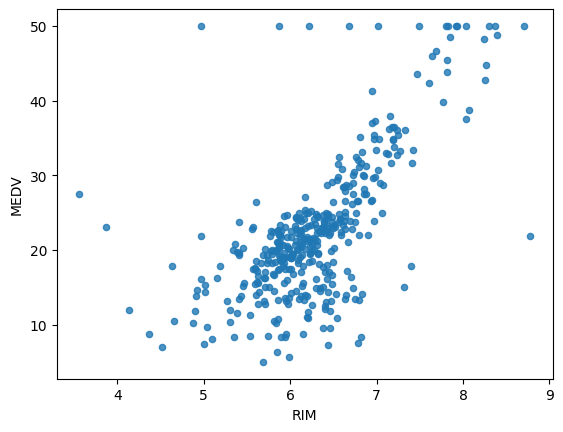

In [18]:
housing.plot(kind="scatter",x="RIM",y="MEDV", alpha=0.8)

## Trying out attribute combination 

In [19]:
housing["TAXRM"]=housing['TAX']/housing['RIM']

In [20]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RIM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [21]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RIM        0.680660
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.530511
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

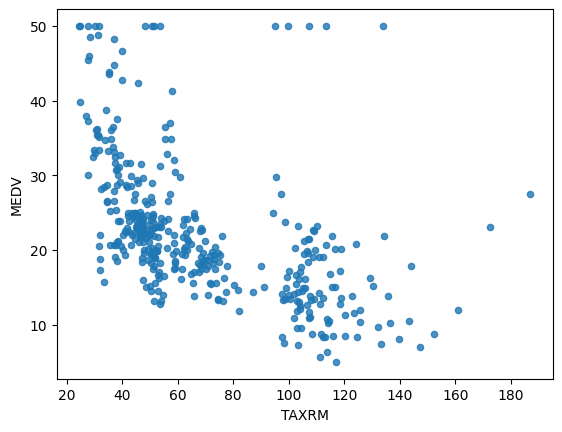

In [22]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV", alpha=0.8)

In [23]:
#seperating features and labels
housing= strat_train_set.drop('MEDV',axis=1)
housing_labels= strat_train_set['MEDV'].copy()


## Missing Attributes

In [24]:
#     To take care of missing attributes u have 3 opts:
#     1.Get rid of missing data points (if 2 or 3 points r thr frm 506 pts)
#     2.Get rid of whole attribute
#     3.Set value to some value(0,mean,median)

In [25]:
housing.dropna(subset=["RIM"]).shape #option 1


(398, 13)

In [26]:
housing.drop("RIM",axis=1).shape #option 2.Drop RIM Column



(404, 12)

In [27]:
median= housing['RIM'].median() #option 3

In [28]:
housing['RIM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RIM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 13)

In [30]:
housing.describe()#before we started filling missing values

,CRIM,ZN,INDUS,CHAS,NOX,RIM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,398.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284289,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.717253,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.222500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.634000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [31]:
#fitting 
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.22250e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
x=imputer.transform(housing)

In [34]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [35]:
housing_tr.describe() 
#housing_tr == new handled data

,CRIM,ZN,INDUS,CHAS,NOX,RIM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283371,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711933,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.222500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## scikit-learn design 
1.Estimators
2.Transformers
3.Predictors


## Feature scaling


Two types of feature scaling methods:


    1.min-max scaling (normalisation)
    (value - min) / (max - min)
    sklearn provides  a class called MinMaxScaler for this
    
    2.standardization:
    (value - mean ) / sd
    sklearn provides  a class called StandardScaler for this

## Creating pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
mypipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

In [37]:
housing_num_tr=mypipeline.fit_transform(housing) # pipeline to original data without imputing
housing_num_tr.shape

(404, 13)

## Selecting a desired model for suma real estates

1.Linear Regression model

In [38]:
#linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing_num_tr, housing_labels)
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=mypipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating the model

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

4.832486904212092

## Cross-validation 

In [40]:
#cross validation of linear regression model
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores
#error is too much....discard the model
#choose another  model: DECISION TREE REGRESSOR

array([4.2143202 , 4.28588036, 5.11064293, 3.82914005, 5.34996126,
       4.38345672, 7.46884447, 5.49160718, 4.14650402, 6.06395608])

In [41]:
def print_scores(scores):
    print('Scores:',scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ',scores.std())
print_scores(rmse_scores)    

Scores: [4.2143202  4.28588036 5.11064293 3.82914005 5.34996126 4.38345672
 7.46884447 5.49160718 4.14650402 6.06395608]
Mean:  5.034431327541801
Standard deviation:  1.0582290123324833


## 

2.Decision Tree Regressor model

In [51]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=mypipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)


#evaluating the model
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse

0.0

In [52]:
#cross-validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([4.0150631 , 5.76211343, 5.31727511, 3.76838582, 3.96295344,
       3.1484917 , 4.10259064, 3.46864527, 3.28199634, 4.41248229])

In [53]:
def print_scores(scores):
    print('Scores:',scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ',scores.std())
print_scores(rmse_scores)    

Scores: [4.0150631  5.76211343 5.31727511 3.76838582 3.96295344 3.1484917
 4.10259064 3.46864527 3.28199634 4.41248229]
Mean:  4.123999716923576
Standard deviation:  0.8028289118134266


## 

3.Random Forest Regressor model

In [54]:
from sklearn.ensemble import RandomForestRegressor 
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=mypipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)


#evaluating the model
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse

1.23372229171289

In [55]:
#cross-validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([2.76407824, 2.77544703, 4.4175209 , 2.50542644, 3.29787603,
       2.61220699, 4.86865031, 3.36520874, 2.97948783, 3.31893097])

In [56]:
def print_scores(scores):
    print('Scores:',scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ',scores.std())
print_scores(rmse_scores)    

Scores: [2.76407824 2.77544703 4.4175209  2.50542644 3.29787603 2.61220699
 4.86865031 3.36520874 2.97948783 3.31893097]
Mean:  3.290483347296186
Standard deviation:  0.740454489145519


## Saving the model

In [60]:
from joblib import dump,load
dump(model, 'Suma.joblib')

['Suma.joblib']

## Testing the model on test data

In [61]:
X_test=strat_test_set.drop('MEDV',axis=1)
Y_test=strat_test_set['MEDV'].copy()
X_test_prepared=mypipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))
final_rmse

[24.602 11.72  25.614 22.212 18.573 14.876 19.842 14.095 32.275 41.768
 19.479 12.213 24.795 26.428 19.389 11.051 31.791 14.097 23.636 17.926
 20.089 17.748 17.962 21.991 18.705 30.815 15.86  32.802  9.157 33.563
 24.295 21.242 22.673 10.931 20.95  11.277 24.454 24.068 23.064 41.954
 24.235 29.569 20.604 20.8   19.357 33.463 44.367 20.058 20.309 21.714
 21.    14.63  21.268 14.921 25.434 33.471 42.3   29.063 19.261 21.015
 47.357  9.542 18.684 24.884 15.058 33.899 19.411 17.952 19.472 33.23
 25.267 22.797 21.05  22.659 34.597 13.211 15.535 20.062 20.499 21.219
 22.565 21.004 14.517 22.858 20.612 21.369 13.836 21.197 21.996 23.044
 18.826 27.42   7.331 26.49  19.064 29.153 19.828 31.798 14.608 26.991
 21.252 20.459] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

3.5187362008227328

## Model usage

In [62]:
from joblib import dump,load
import numpy as np
model=load('Suma.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24663662, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -3.86091034]])
model.predict(features)

array([24.482])